In [1]:
# NumPy
import numpy as np # linear algebra

# Dataframe operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Helper Functions
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv


## Attribute Definitions ##

Matrix column entries (attributes):

+ name - ASCII subject name and recording number
+ MDVP:Fo(Hz) - Average vocal fundamental frequency
+ MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
+ MDVP:Flo(Hz) - Minimum vocal fundamental frequency
+ MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
+ MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
+ NHR,HNR - Two measures of ratio of noise to tonal components in the voice status
+ Health status of the subject (one) - Parkinson's, (zero) - healthy
+ RPDE,D2 - Two nonlinear dynamical complexity measures
+ DFA - Signal fractal scaling exponent
+ spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

# Load Dataset

In [2]:
data = pd.read_csv('/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

all the features are floating point numeric, except the status which is binary (1 = parkinson's, 0 = healthy)

In [4]:
print(data.describe(include='all'))

                  name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
count              195   195.000000    195.000000    195.000000   
unique             195          NaN           NaN           NaN   
top     phon_R01_S01_1          NaN           NaN           NaN   
freq                 1          NaN           NaN           NaN   
mean               NaN   154.228641    197.104918    116.324631   
std                NaN    41.390065     91.491548     43.521413   
min                NaN    88.333000    102.145000     65.476000   
25%                NaN   117.572000    134.862500     84.291000   
50%                NaN   148.790000    175.829000    104.315000   
75%                NaN   182.769000    224.205500    140.018500   
max                NaN   260.105000    592.030000    239.170000   

        MDVP:Jitter(%)  MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  \
count       195.000000        195.000000  195.000000  195.000000  195.000000   
unique             NaN             

## Plot up features

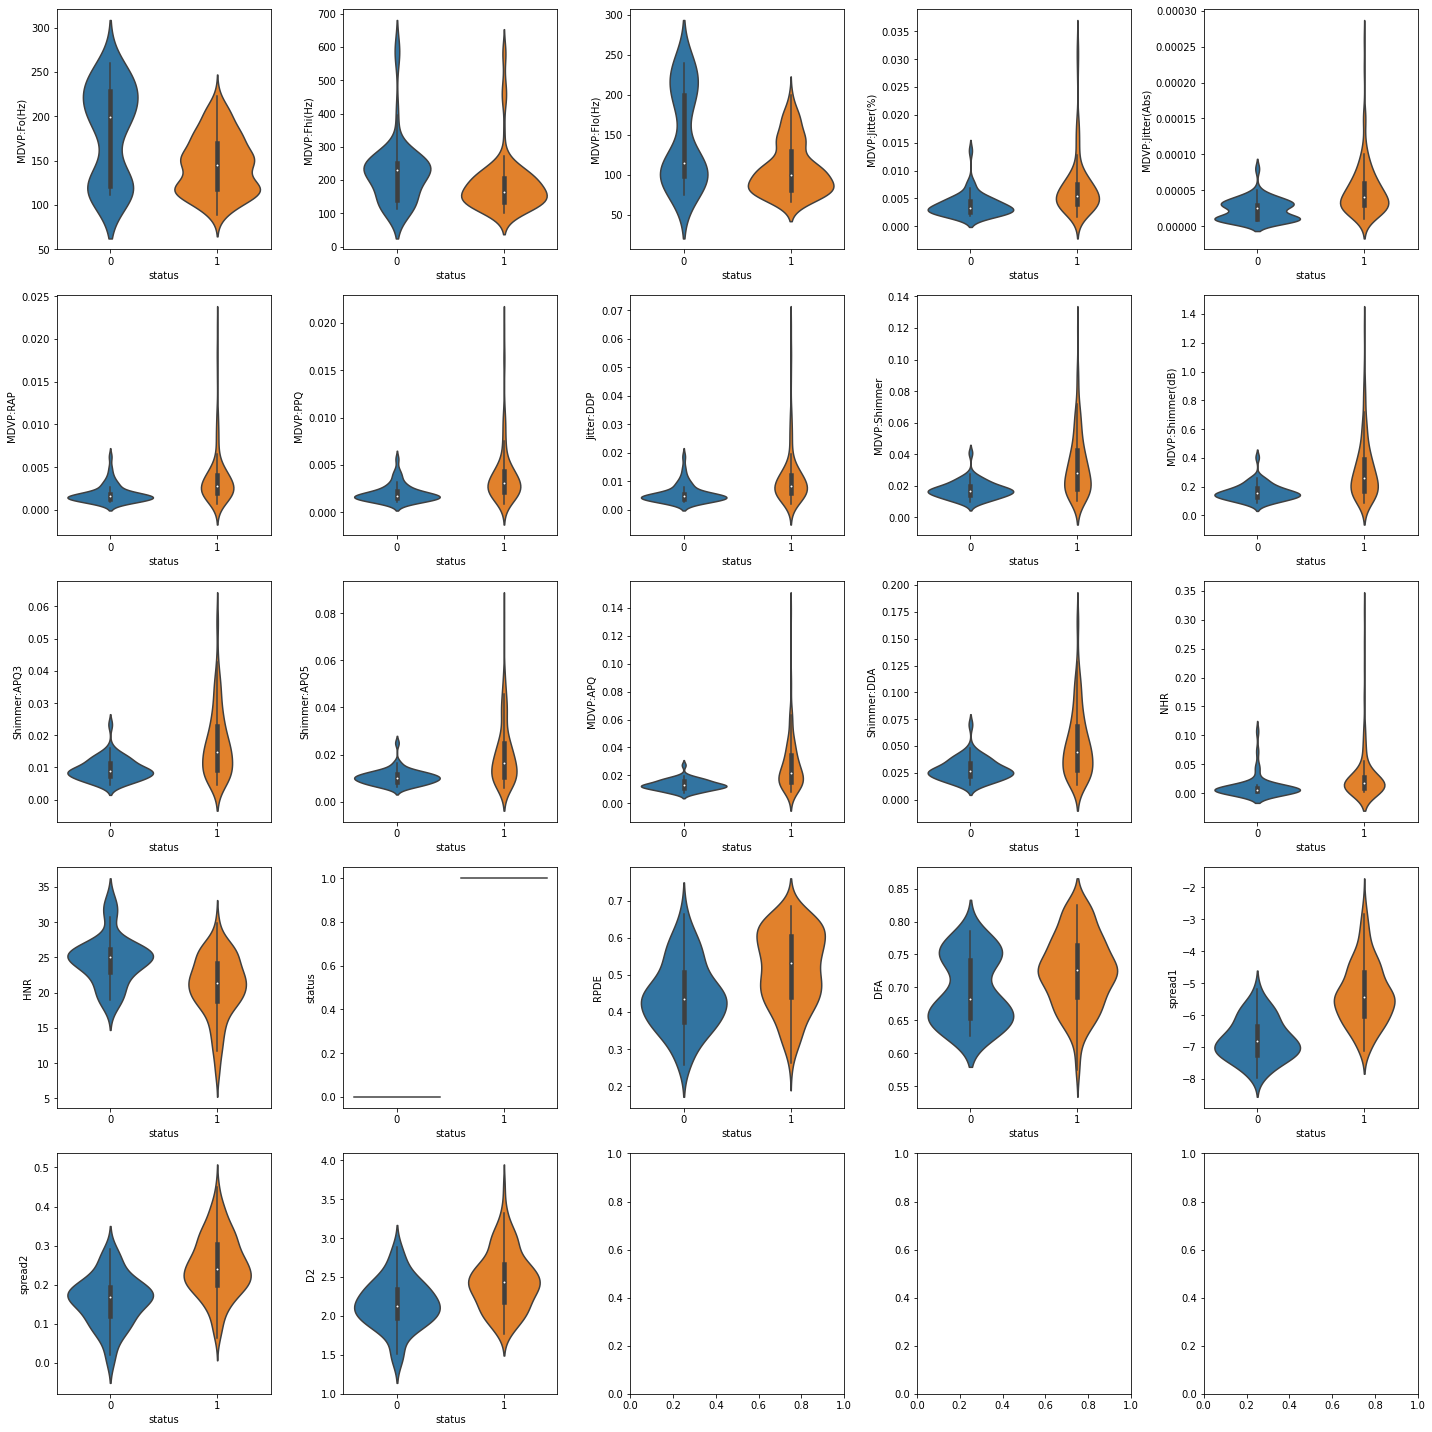

In [9]:
fig,axes = plt.subplots(5,5,figsize=(20,20))
axes=axes.flatten()

for i in range(1, len(data.columns)-1):
    sns.violinplot(x='status', y=data.iloc[:,i], data=data, orient='v', ax=axes[i-1])
plt.tight_layout()
plt.show()
plt.close()

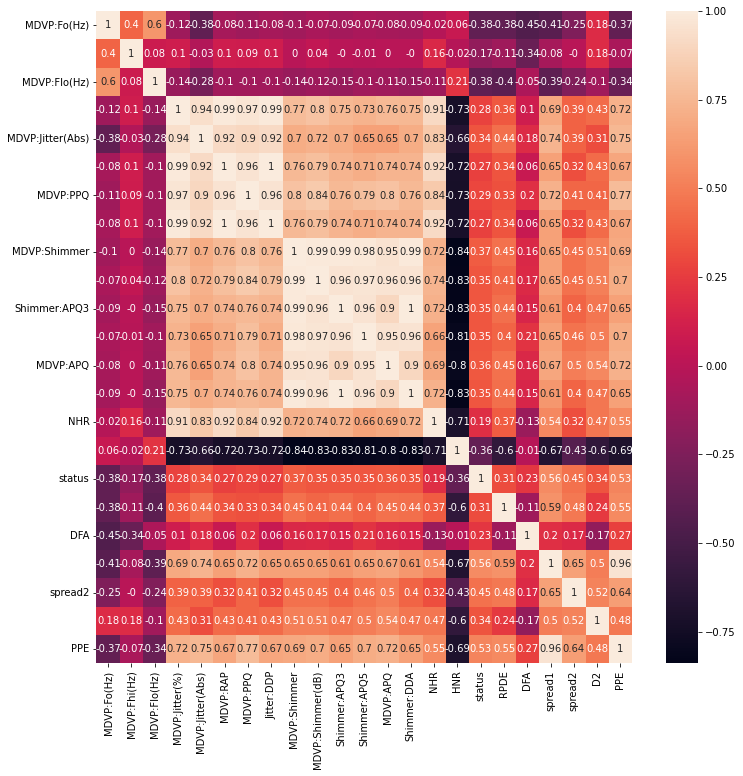

In [10]:
matrix = data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(12, 12)
plt.show()

# Define features and target arrays

In [36]:
X = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,20,21,22,23]]
# X = data.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
y = data.iloc[:,17]

percent_has_parkinsons = round(sum(data.status)/len(data)*100, 2)
print(f"{percent_has_parkinsons} percept of examples in dataset have Parkinsons.")

data.status.value_counts()


75.38 percept of examples in dataset have Parkinsons.


1    147
0     48
Name: status, dtype: int64

# Split dataset into training and validation arrays

In [86]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale Features

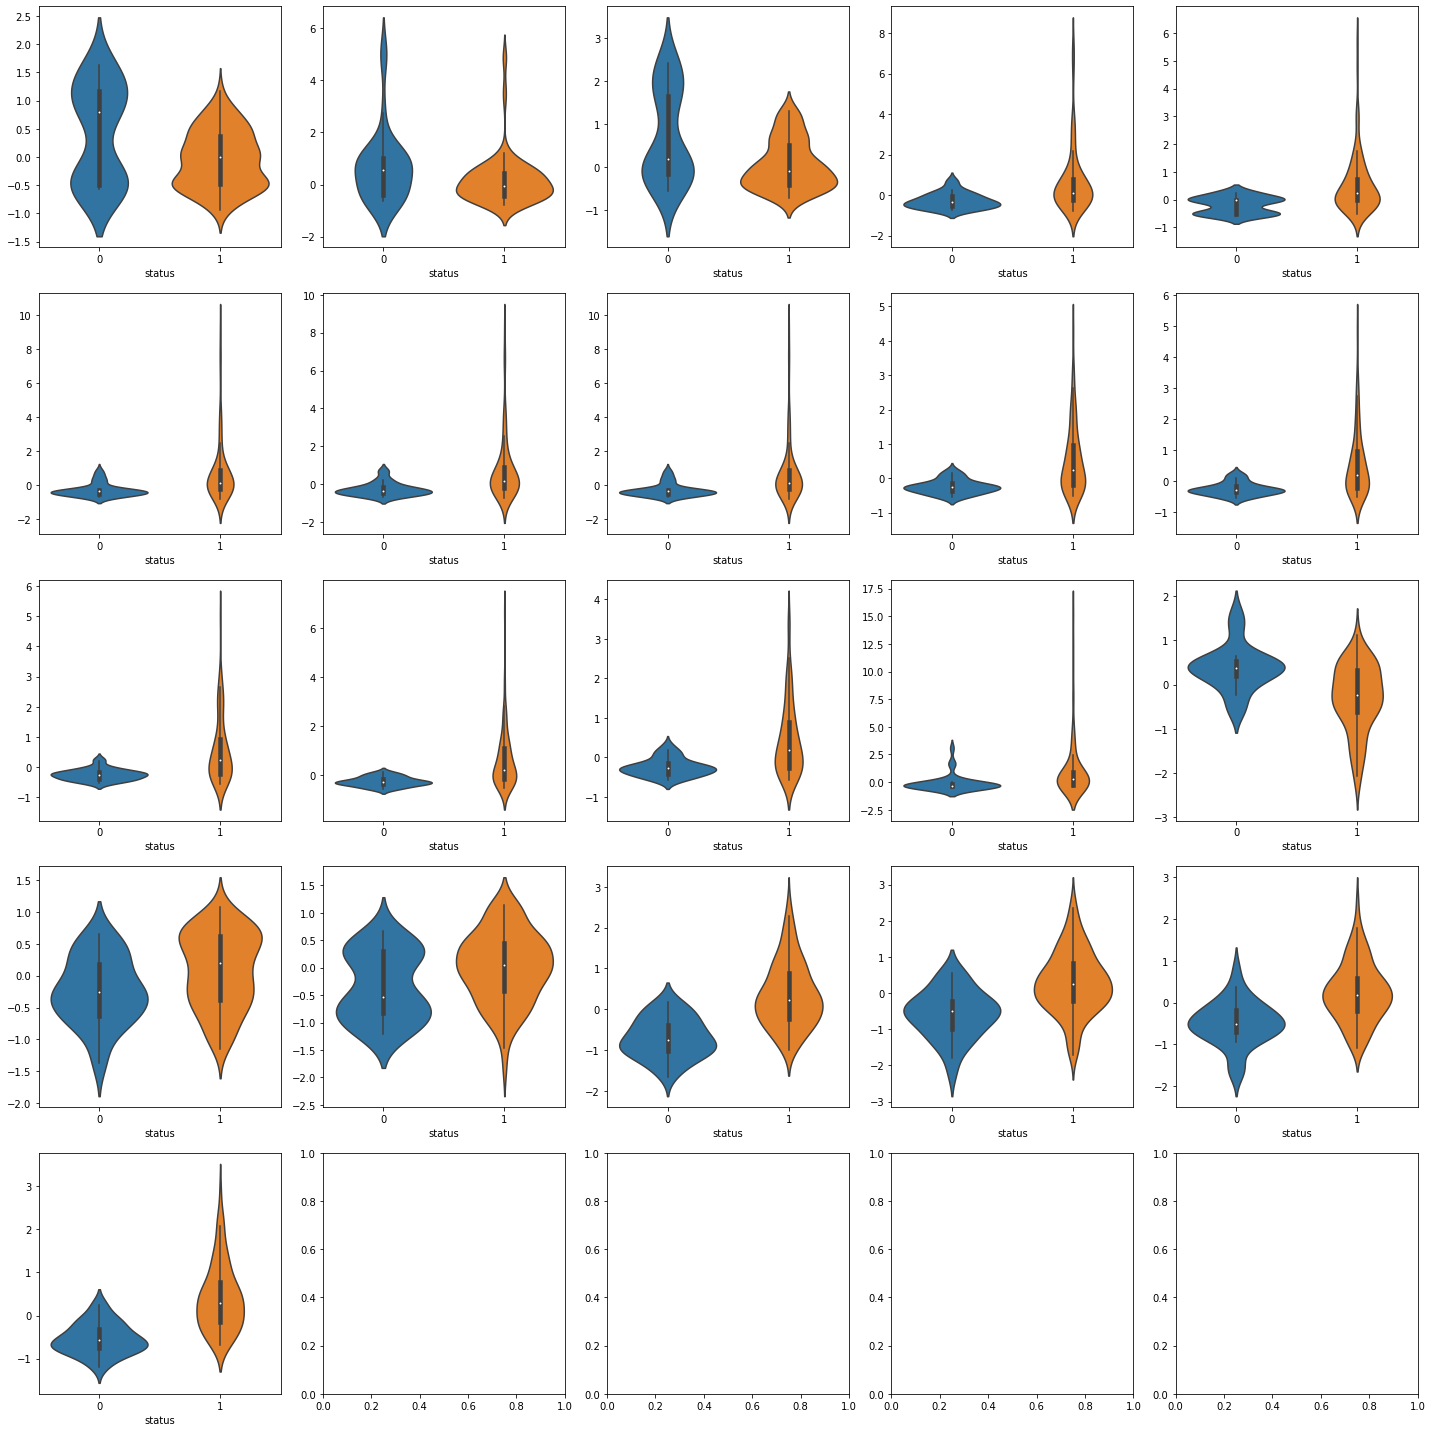

In [110]:
# Scale Data

# Fit on training set only:
# scaler = StandardScaler()
scaler = RobustScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

fig,axes = plt.subplots(5,5,figsize=(20,20))
axes=axes.flatten()

for i in range(np.size(X_train, 1)):
    sns.violinplot(x=y_train, y=X_train[:,i], orient='v', ax=axes[i])
plt.tight_layout()
plt.show()
plt.close()

## Define Functions ##

In [111]:
cm_dict = dict()
def get_confusion_matrix(y, y_pred):
    cm = metrics.confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = round(metrics.accuracy_score(y, y_pred), 2)
    print(f'Model accuracy: {accuracy*100}')
    print(f'Confusion Matrix: \n{cm}')
    precision = cm[1][1]/(cm[1][1] + cm[0][1])
    recall = cm[1][1] / (cm[1][1] + cm[1][0])
    print(f'Precision: {round(precision, 2)}')
    print(f'Recall: {round(recall, 2)}')
    return cm

# Models

## 1. Logistic Regression

In [112]:
# model_cm_dict = dict()

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)

# Predict y for validation set
y_pred = model_lr.predict(X_val)

# Evaluate Model Accuracy
cm_dict['logistic regression'] = get_confusion_matrix(y_val, y_pred)


Model accuracy: 90.0
Confusion Matrix: 
[[10  5]
 [ 1 43]]
Precision: 0.9
Recall: 0.98


## 2. K Nearest Neighbors

In [113]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Predict y for validation set
y_pred = model_knn.predict(X_val)

# Evaluate Model Accuracy
cm_dict['K Nearest Neighbors'] = get_confusion_matrix(y_val, y_pred)

Model accuracy: 90.0
Confusion Matrix: 
[[10  5]
 [ 1 43]]
Precision: 0.9
Recall: 0.98


## 3. Neural Network

In [114]:
# Build neural network

model_nn = Sequential([
    Dense(units=12, kernel_regularizer=l2(0.01), activation='relu'),
#     Dense(units=15, kernel_regularizer=l2(0.001), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [115]:
# Train neural network

model_nn.compile(optimizer='adam', loss=BinaryCrossentropy())
model_nn.fit(X_train,y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8116
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7866
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7640
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7453
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7286
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7137
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6985
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6854
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6730
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6612
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6510
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6410
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

In [116]:
# Make predictions using model
    
y_pred = model_nn.predict(X_val)
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# Evaluate Model Accuracy
cm_dict['neural network'] = get_confusion_matrix(y_val, y_pred)

Model accuracy: 88.0
Confusion Matrix: 
[[ 9  6]
 [ 1 43]]
Precision: 0.88
Recall: 0.98


## 4. Random Forest

In [117]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_val)
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
        
# Evaluate Model Accuracy
cm_dict['random forest'] = get_confusion_matrix(y_val, y_pred)

Model accuracy: 92.0
Confusion Matrix: 
[[11  4]
 [ 1 43]]
Precision: 0.91
Recall: 0.98


## 5. XGBoost ##

In [118]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_val)

# Evaluate Model Accuracy
cm_dict['XGBoost'] = get_confusion_matrix(y_val, y_pred)

Model accuracy: 92.0
Confusion Matrix: 
[[10  5]
 [ 0 44]]
Precision: 0.9
Recall: 1.0


# Compare Model Results

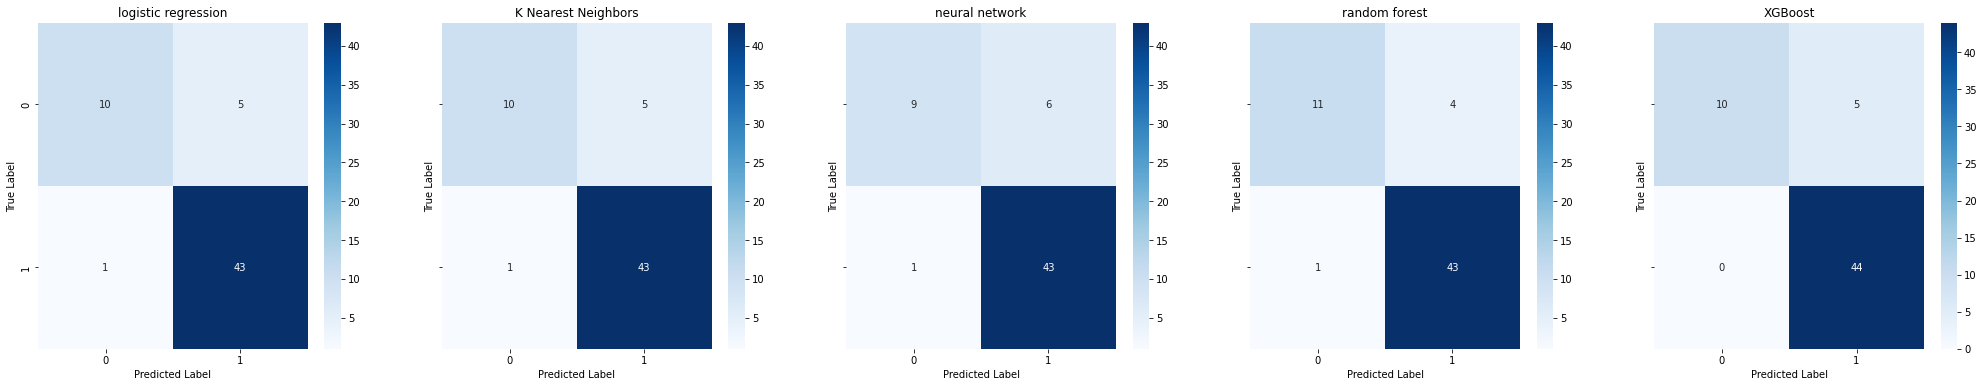

In [120]:
# Plot Confusion Matrix

fig,axes = plt.subplots(1,len(cm_dict),figsize=(35,6), sharey=True)
axes=axes.flatten()
# group_names = ['True Neg','False Pos','False Neg','True Pos']

for i, (method, cm) in enumerate(cm_dict.items()):
    sns.heatmap(cm_dict[method], ax=axes[i], annot=True, cmap='Blues')
    axes[i].set_title(method)
    axes[i].set(ylabel='True Label', xlabel="Predicted Label")

## Results Discussion ##

There is similar performance among the 5 methods tested, however the XGBoost decision tree perfomed the best with the highest number of True Positives and zero false negatives (100% recall) on the validation set while maintaining the second lowest rate of false positives (90% precision). It had 1 more false positive than the Random Forest, however one might argubaly prefer to have additional false positives than false negatives for this type of test, as the false positives can be ruled out with additional diagnoses.